Write a program to implement recurrent neural network on sunspot dataset compare it with LSTM.Find out the training and testing accuracy for no of timestep as 5,8,12,15

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [ ]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [ ]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

time_steps = 5
# time_steps = 8
# time_steps = 12
# time_steps = 15
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [ ]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2,validation_data=(testX, testY))

Epoch 1/20
451/451 - 7s - loss: 0.0601 - val_loss: 0.0519 - 7s/epoch - 17ms/step
Epoch 2/20
451/451 - 3s - loss: 0.0172 - val_loss: 0.0315 - 3s/epoch - 7ms/step
Epoch 3/20
451/451 - 2s - loss: 0.0123 - val_loss: 0.0166 - 2s/epoch - 5ms/step
Epoch 4/20
451/451 - 2s - loss: 0.0109 - val_loss: 0.0136 - 2s/epoch - 3ms/step
Epoch 5/20
451/451 - 2s - loss: 0.0100 - val_loss: 0.0120 - 2s/epoch - 4ms/step
Epoch 6/20
451/451 - 2s - loss: 0.0092 - val_loss: 0.0121 - 2s/epoch - 3ms/step
Epoch 7/20
451/451 - 2s - loss: 0.0082 - val_loss: 0.0099 - 2s/epoch - 3ms/step
Epoch 8/20
451/451 - 2s - loss: 0.0080 - val_loss: 0.0097 - 2s/epoch - 3ms/step
Epoch 9/20
451/451 - 2s - loss: 0.0076 - val_loss: 0.0088 - 2s/epoch - 5ms/step
Epoch 10/20
451/451 - 2s - loss: 0.0073 - val_loss: 0.0095 - 2s/epoch - 4ms/step
Epoch 11/20
451/451 - 2s - loss: 0.0072 - val_loss: 0.0088 - 2s/epoch - 3ms/step
Epoch 12/20
451/451 - 2s - loss: 0.0070 - val_loss: 0.0091 - 2s/epoch - 4ms/step
Epoch 13/20
451/451 - 2s - loss: 0.0

In [11]:
def print_error(trainY, testY, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

21/21 [==============================] - 0s 4ms/step
Train RMSE: 0.069 RMSE
Test RMSE: 0.062 RMSE


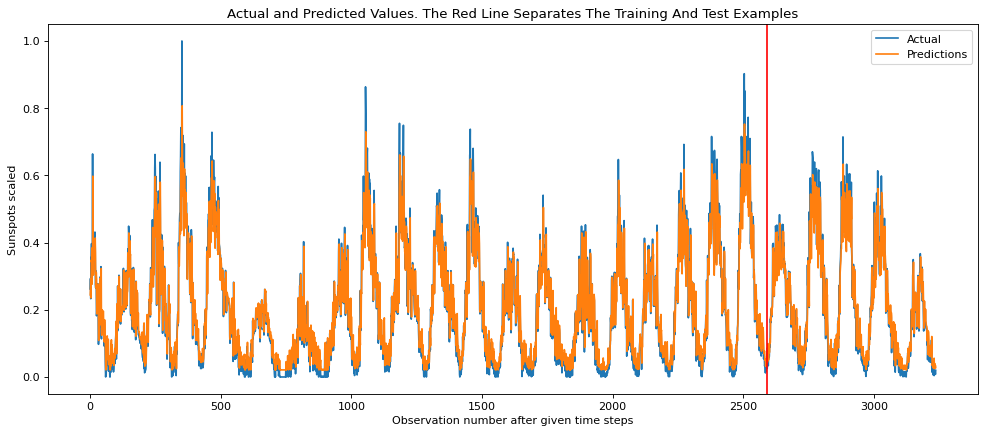

In [12]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(trainY, testY, train_predict, test_predict)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
### Sunspot data taken monthly
sunspots_monthly = pd.read_csv('/content/SN_m_tot_V2.0.csv',sep=';',header=None)
# sunspots_monthly = read_csv(sunspots_url, usecols=[1], engine='python')
sunspots_monthly.columns = ["year", "month", "fractionyear", "monthlymean", "monthlystd", "nobs", "definitive"]

In [9]:
x = sunspots_monthly["fractionyear"].values
y = sunspots_monthly["monthlymean"].values

### Normalize data
scaler = MinMaxScaler()
yscaled = scaler.fit_transform(y.reshape(-1,1))

### Split data into training and test sets
trainingfraction = 0.8
train_size = int(len(yscaled) * trainingfraction)
test_size = len(yscaled)-train_size
train, test = yscaled[0:train_size,:], yscaled[train_size:,:]

### The LSTM network expects input data (X) to have the array structure of [samples, time steps, features]
### Currently the data has the form [samples, features] and the problem is framed as one time step for each sample


### Function to create a new dataset
def create_dataset(dataset, look_back):
	### INPUT:	dataset = Numpy array
	### 		look_back = number of previous time steps to use as input variables to predict the next time period
	X, Y = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		X.append(a)
		Y.append(dataset[i + look_back, 0])
	return np.array(X), np.array(Y)

### Reshape data into X = t and Y = t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

### Now reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


### Create and fit the LSTM network
### The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons
### and an output layer that makes a single value prediction. The default sigmoid activation 
### function is used for the LSTM blocks. The network is trained for 10 epochs and a batch 
### size of 1 is used.
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
r=model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2,validation_data=(testX, testY))

Epoch 1/10
2591/2591 - 12s - loss: 0.0138 - val_loss: 0.0042 - 12s/epoch - 5ms/step
Epoch 2/10
2591/2591 - 9s - loss: 0.0049 - val_loss: 0.0040 - 9s/epoch - 3ms/step
Epoch 3/10
2591/2591 - 12s - loss: 0.0049 - val_loss: 0.0041 - 12s/epoch - 5ms/step
Epoch 4/10
2591/2591 - 8s - loss: 0.0048 - val_loss: 0.0039 - 8s/epoch - 3ms/step
Epoch 5/10
2591/2591 - 10s - loss: 0.0048 - val_loss: 0.0042 - 10s/epoch - 4ms/step
Epoch 6/10
2591/2591 - 12s - loss: 0.0048 - val_loss: 0.0039 - 12s/epoch - 5ms/step
Epoch 7/10
2591/2591 - 8s - loss: 0.0048 - val_loss: 0.0043 - 8s/epoch - 3ms/step
Epoch 8/10
2591/2591 - 9s - loss: 0.0048 - val_loss: 0.0039 - 9s/epoch - 3ms/step
Epoch 9/10
2591/2591 - 10s - loss: 0.0048 - val_loss: 0.0038 - 10s/epoch - 4ms/step
Epoch 10/10
2591/2591 - 8s - loss: 0.0048 - val_loss: 0.0039 - 8s/epoch - 3ms/step


In [19]:
### Predict the training and test data
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

### Invert the predictions back to original data scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

### Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print("Train Score: {:.2f} RMS".format(trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print("Test Score: {:.2f} RMSE".format(testScore))

### Plot data and predictions
### First shift train and test predictions for plotting
trainPredictPlot = np.empty_like(yscaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
testPredictPlot = np.empty_like(yscaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(yscaled)-1, :] = testPredict

pl.plot(scaler.inverse_transform(yscaled),'ro',alpha=0.4,ms=4,label='Data')
pl.plot(trainPredictPlot, 'b-',label='Train')
pl.plot(testPredictPlot, 'g-',label='Test')
pl.legend()
pl.show()

21/21 [==============================] - 0s 3ms/step
Train Score: 27.35 RMS
Test Score: 24.73 RMSE
